In [1]:
import pandas as pd # dataframe, series 
import numpy as np # scientific computing package - arrays

# machine learning package
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns # package for visualizations - more than matplotlib

import graphviz
import pydotplus
import io
from scipy import misc
from matplotlib.pyplot import imread

# cell magic:
%matplotlib inline 

## Spotify Song Attributes EDA:
- Import Dataset
- Exploratory Data Analysis (EDA) to vizualize data and observe structure 
- Train a classifier (Decision Tree)
- Predict target using the trained classifier 
### Link 1.del:
https://www.youtube.com/watch?v=v_sPnwoT_iA&list=LL&index=46

In [2]:
# inicializiramo dataframe 
data = pd.read_csv('spotify EDA - data.csv')

In [3]:
data # vrne nam celotno tabelo

data.describe() # vrne nam statistiko podatkov

data.head() # vrne nam prvih pet vrstic

data.info() # vrne nam info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [4]:
# razdelimo data na dva dela, na train in na test podatke (teh bo 15 %)
train, test = train_test_split(data, test_size=0.15)

print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 1714; Test size: 303


In [5]:
pos_tempo = data[data['target'] == 1]['tempo'] ## tempo od glasbe, ki jo je user lajkal
neg_tempo = data[data['target'] == 0]['tempo'] ## tempo od glasbe, ki jo je user dislajkal

pos_dance = data[data['target'] == 1]['danceability'] 
neg_dance = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms'] 
neg_duration = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness'] 
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness'] 
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence'] 
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy'] 
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness'] 
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key'] 
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness'] 
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']


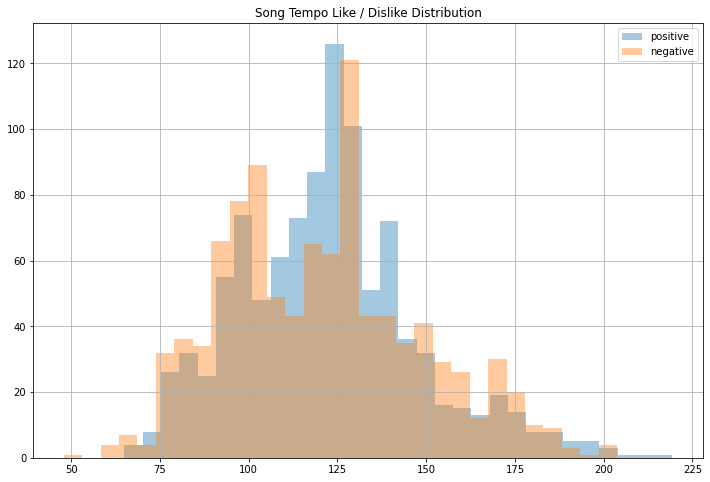

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.4, bins = 30, label = 'positive')
neg_tempo.hist(alpha = 0.4, bins = 30, label = 'negative')
plt.legend(loc = "upper right")

### Daljši način implementacije grafov:
________________________________________________________

<AxesSubplot:title={'center':'Song Instrumentalness Like Distribution'}, xlabel='Instrumentalness', ylabel='Count'>

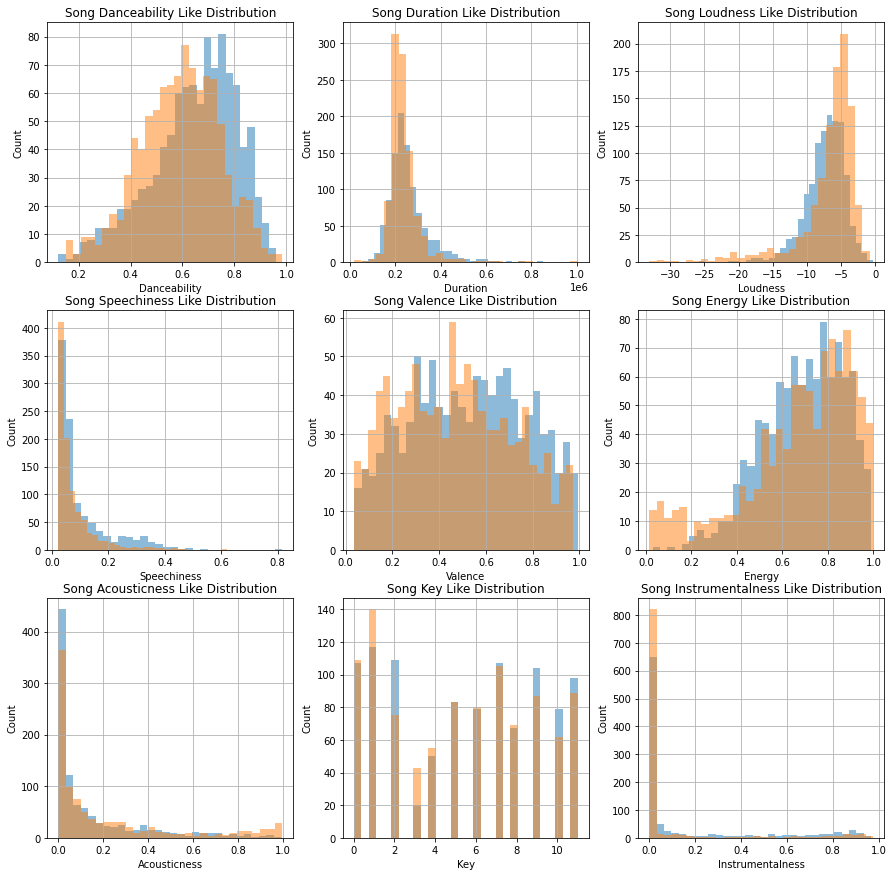

In [7]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
ax1 = fig2.add_subplot(331)
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Count')
ax1.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)
neg_dance.hist(alpha = 0.5, bins = 30)

# Duration
ax2 = fig2.add_subplot(332)
ax2.set_xlabel('Duration')
ax2.set_ylabel('Count')
ax2.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha = 0.5, bins = 30)
neg_duration.hist(alpha = 0.5, bins = 30)

# Loudness
ax3 = fig2.add_subplot(333)
ax3.set_xlabel('Loudness')
ax3.set_ylabel('Count')
ax3.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha = 0.5, bins = 30)
neg_loudness.hist(alpha = 0.5, bins = 30)

# Speechiness
ax4 = fig2.add_subplot(334)
ax4.set_xlabel('Speechiness')
ax4.set_ylabel('Count')
ax4.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha = 0.5, bins = 30)
neg_speechiness.hist(alpha = 0.5, bins = 30)

# Valence
ax5 = fig2.add_subplot(335)
ax5.set_xlabel('Valence')
ax5.set_ylabel('Count')
ax5.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha = 0.5, bins = 30)
neg_valence.hist(alpha = 0.5, bins = 30)

# Energy
ax6 = fig2.add_subplot(336)
ax6.set_xlabel('Energy')
ax6.set_ylabel('Count')
ax6.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha = 0.5, bins = 30)
neg_energy.hist(alpha = 0.5, bins = 30)

# Acousticness
ax7 = fig2.add_subplot(337)
ax7.set_xlabel('Acousticness')
ax7.set_ylabel('Count')
ax7.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha = 0.5, bins = 30)
neg_acousticness.hist(alpha = 0.5, bins = 30)

# Key
ax8 = fig2.add_subplot(338)
ax8.set_xlabel('Key')
ax8.set_ylabel('Count')
ax8.set_title('Song Key Like Distribution')
pos_key.hist(alpha = 0.5, bins = 30)
neg_key.hist(alpha = 0.5, bins = 30)

# Instrumentalness
ax9 = fig2.add_subplot(339)
ax9.set_xlabel('Instrumentalness')
ax9.set_ylabel('Count')
ax9.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha = 0.5, bins = 30)
neg_instrumentalness.hist(alpha = 0.5, bins = 30)

### Krajši način implementacije grafov:
__________________________________________________

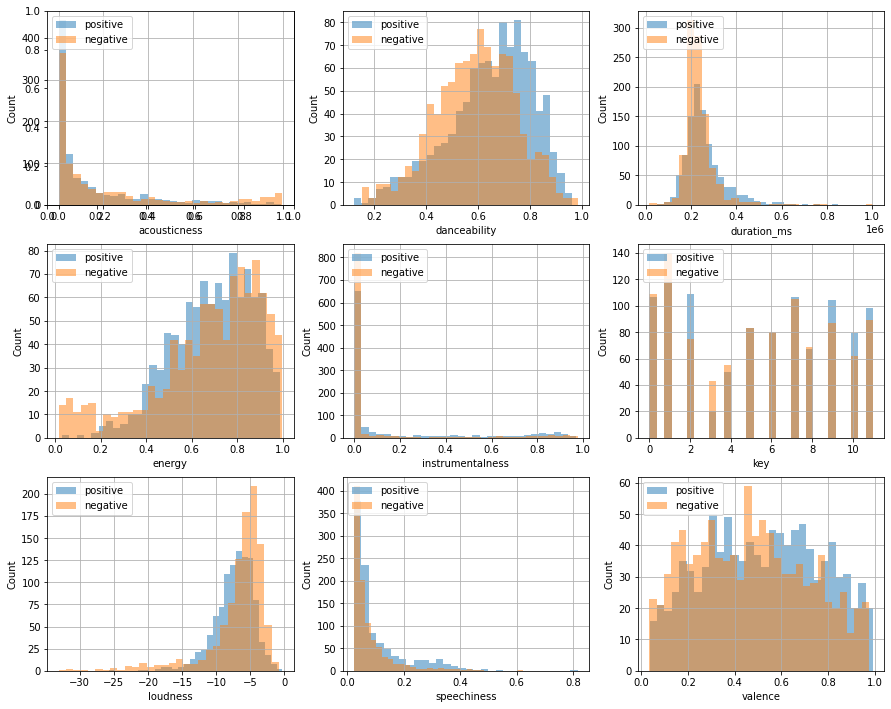

In [8]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))

c = 1

# zip() function vzame od vsakega parametra prvi element in ju da skupaj v tuple, proces se nadaljuje...
# enumerate() method adds a counter to an iterable and returns it in a form of enumerating object 

for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['danceability', 'duration_ms', 
                'loudness', 'speechiness', 'valence', 
                'energy', 'acousticness', 'key', 'instrumentalness']
    if colName in features:
        
        pos = data[data['target'] == 1][colName]
        neg = data[data['target'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        pos.hist(alpha = 0.5, bins=30, label='positive')
        neg.hist(alpha = 0.5, bins=30, label='negative')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
    

## Implementing DT:
### Link 2. dela:
https://www.youtube.com/watch?v=XDbj6PxaSf0&list=LL&index=48

In [9]:
c = DecisionTreeClassifier(min_samples_split=100)

In [10]:
features = ['tempo', 'danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'acousticness', 'key', 'instrumentalness']

In [11]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [12]:
# building decision tree - dt (fit on our clasifier - c)
dt = c.fit(x_train, y_train)

In [13]:
def show_tree(tree, features, path):
    # file:
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

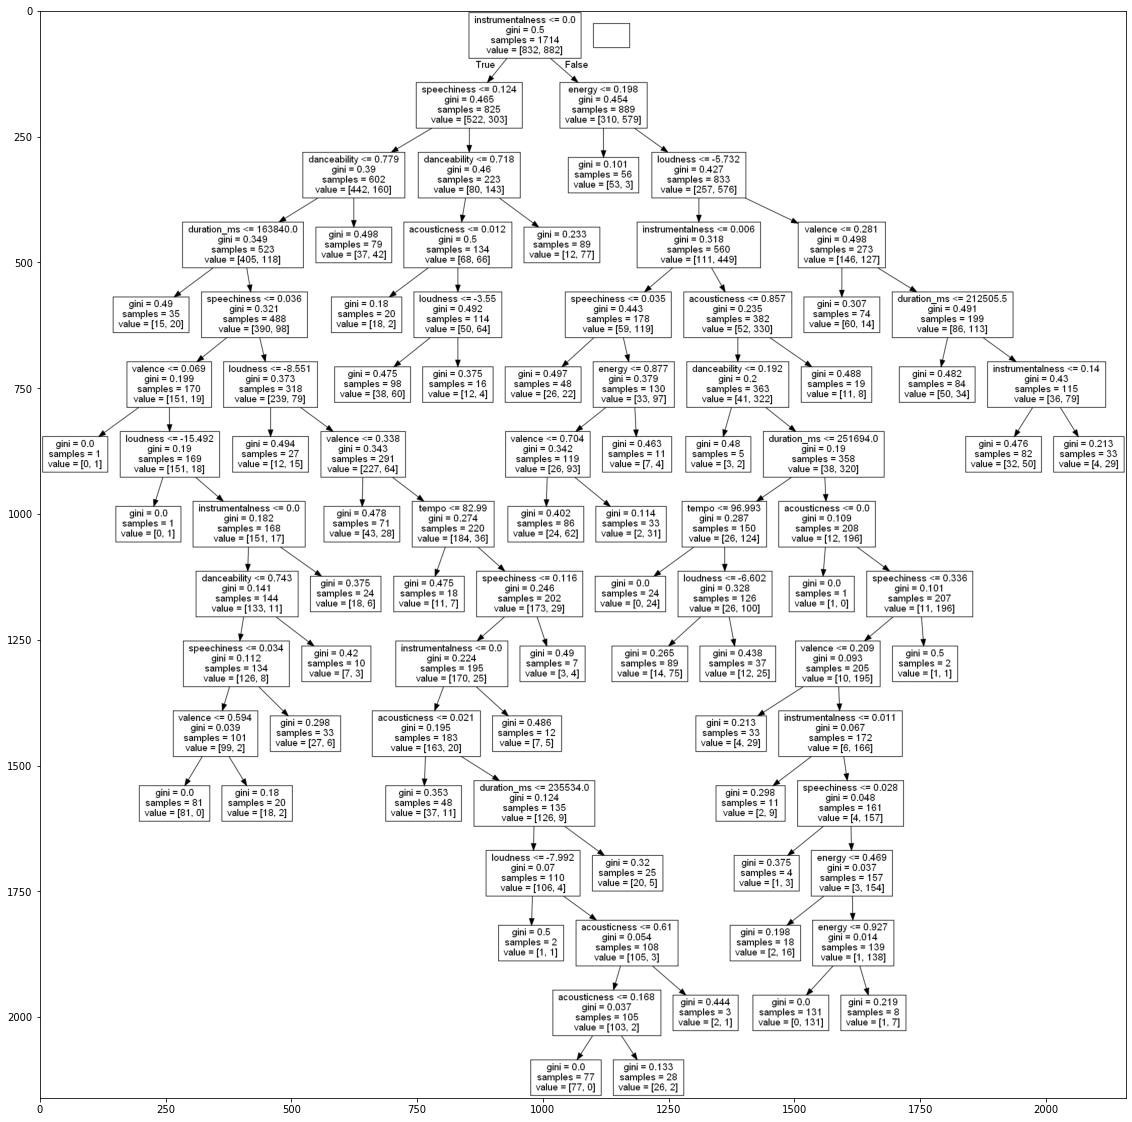

In [14]:
show_tree(dt, features, 'dec_tree_01.png')

In [15]:
y_pred = c.predict(x_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)*100

In [16]:
print("Accuracy using Decision tree: ", round(score, 1), "%")

Accuracy using Decision tree:  72.6 %
